In [29]:
# Importando Librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [30]:
# Lectura de archivo
df = pd.read_csv('./Data/depression_data.csv')

## Composición del dataframe

In [31]:
df.shape

(413768, 16)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413768 entries, 0 to 413767
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Name                          413768 non-null  object 
 1   Age                           413768 non-null  int64  
 2   Marital Status                413768 non-null  object 
 3   Education Level               413768 non-null  object 
 4   Number of Children            413768 non-null  int64  
 5   Smoking Status                413768 non-null  object 
 6   Physical Activity Level       413768 non-null  object 
 7   Employment Status             413768 non-null  object 
 8   Income                        413768 non-null  float64
 9   Alcohol Consumption           413768 non-null  object 
 10  Dietary Habits                413768 non-null  object 
 11  Sleep Patterns                413768 non-null  object 
 12  History of Mental Illness     413768 non-nul

In [33]:
df.tail()

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
413763,Sean Miller,68,Married,Master's Degree,0,Former,Moderate,Employed,109233.43,Low,Healthy,Good,No,No,No,No
413764,Christina Brown,26,Single,Bachelor's Degree,0,Current,Active,Employed,96760.97,Low,Healthy,Poor,Yes,Yes,No,Yes
413765,Matthew Jenkins,57,Married,Bachelor's Degree,0,Non-smoker,Sedentary,Employed,77353.26,Moderate,Moderate,Fair,No,No,Yes,Yes
413766,Gary Faulkner,71,Married,Associate Degree,2,Non-smoker,Sedentary,Unemployed,24557.08,Moderate,Moderate,Poor,No,Yes,No,No
413767,Joseph Johnson,62,Widowed,Master's Degree,0,Former,Moderate,Employed,107125.74,Moderate,Healthy,Good,No,Yes,No,No


In [34]:
df.describe()

,Age,Number of Children,Income
count,413768.000000,413768.000000,413768.000000
mean,49.000713,1.298972,50661.707971
std,18.158759,1.237054,40624.100565
min,18.000000,0.000000,0.410000
25%,33.000000,0.000000,21001.030000
50%,49.000000,1.000000,37520.135000
75%,65.000000,2.000000,76616.300000
max,80.000000,4.000000,209995.220000


In [35]:
df['Chronic Medical Conditions'].value_counts()

Chronic Medical Conditions
No     277561
Yes    136207
Name: count, dtype: int64

In [36]:
df

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,Charles Jordan,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,Michael Rich,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413763,Sean Miller,68,Married,Master's Degree,0,Former,Moderate,Employed,109233.43,Low,Healthy,Good,No,No,No,No
413764,Christina Brown,26,Single,Bachelor's Degree,0,Current,Active,Employed,96760.97,Low,Healthy,Poor,Yes,Yes,No,Yes
413765,Matthew Jenkins,57,Married,Bachelor's Degree,0,Non-smoker,Sedentary,Employed,77353.26,Moderate,Moderate,Fair,No,No,Yes,Yes
413766,Gary Faulkner,71,Married,Associate Degree,2,Non-smoker,Sedentary,Unemployed,24557.08,Moderate,Moderate,Poor,No,Yes,No,No


## Sección de Gráficas    

Gráficas para variables categóricas
- Age : Focus en 42,24,52
- Marital Status
- Education Level 
- Number of Children
- Smoking Status 
- Physical Activity Level 
- Alcohol Consumption
- Dietary Habits
- Sleep Patterns
- 3D ( History of Mental Illness, History of Substance Abuse, Family History of Depression )

/home/aipa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/aipa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/aipa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/aipa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, yo

,Name
Age,
42,6740
43,6700
47,6700
24,6695
52,6693
...,...
18,6470
65,6449
76,6442


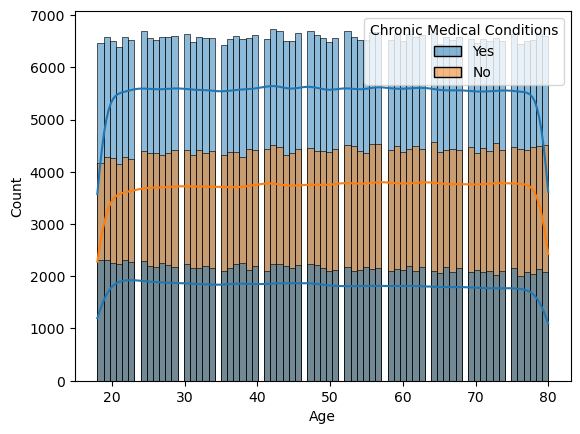

In [37]:
#Distribución de Depresión por edad 
sns.histplot(df['Age'], kde=True)
sns.histplot(data=df, x='Age', kde=True, hue='Chronic Medical Conditions')
#Tabla con Edades
df[['Age','Name']].groupby('Age').agg('count').sort_values(by='Name',ascending=False)

/home/aipa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/aipa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/aipa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/aipa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, yo

,Age
Marital Status,
Married,240444
Single,72110
Widowed,68485
Divorced,32729


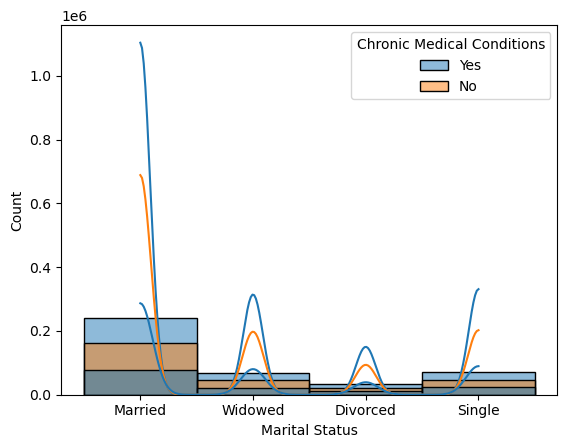

In [38]:
#Histograma
sns.histplot(df['Marital Status'], kde=True)
sns.histplot(data=df, x='Marital Status', kde=True, hue='Chronic Medical Conditions')

# Tabla de Matrimonio
df[['Age','Marital Status']].groupby('Marital Status').agg('count').sort_values(by='Age',ascending=False)

/home/aipa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/aipa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/aipa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/aipa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, yo

,Age
Education Level,
Bachelor's Degree,124329
High School,118927
Associate Degree,79999
Master's Degree,73768
PhD,16745


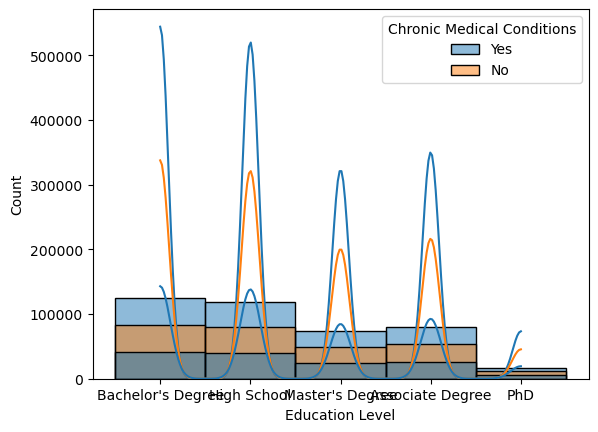

In [39]:
# Histograma
sns.histplot(df['Education Level'], kde=True)
sns.histplot(data=df, x='Education Level', kde=True, hue='Chronic Medical Conditions')

# Nivel de Educación
df[['Age','Education Level']].groupby('Education Level').agg('count').sort_values(by='Age',ascending=False)

/home/aipa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/aipa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/aipa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/aipa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, yo

,Age
Number of Children,
0,155232
2,83961
1,83925
3,76974
4,13676


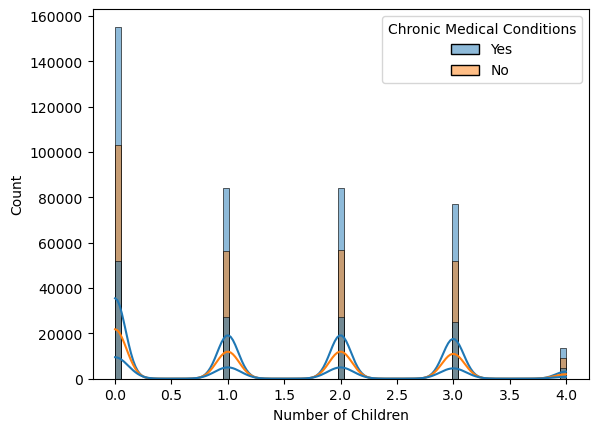

In [40]:
# Histograma
sns.histplot(df['Number of Children'], kde=True)
sns.histplot(data=df, x='Number of Children', kde=True, hue='Chronic Medical Conditions')

# Numero de hijos
df[['Age','Number of Children']].groupby('Number of Children').agg('count').sort_values(by='Age',ascending=False)

/home/aipa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/aipa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/aipa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/aipa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, yo

,Age
Smoking Status,
Non-smoker,247416
Former,116184
Current,50168


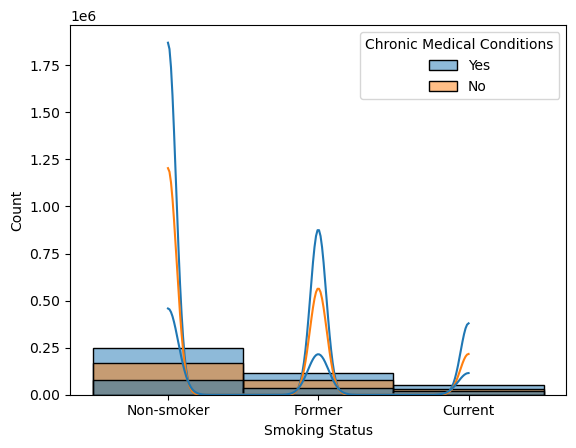

In [41]:
# Histograma
sns.histplot(df['Smoking Status'], kde=True)
sns.histplot(data=df, x='Smoking Status', kde=True, hue='Chronic Medical Conditions')

# Fumadores?
df[['Age','Smoking Status']].groupby('Smoking Status').agg('count').sort_values(by='Age',ascending=False)

/home/aipa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/aipa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/aipa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/aipa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, yo

,Age
Physical Activity Level,
Sedentary,176850
Moderate,158013
Active,78905


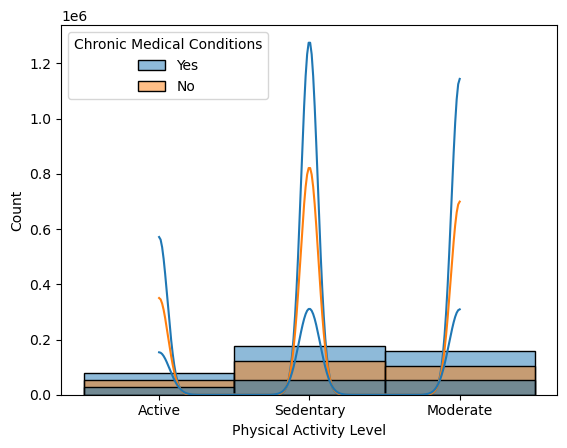

In [42]:
# Histograma
sns.histplot(df['Physical Activity Level'], kde=True)
sns.histplot(data=df, x='Physical Activity Level', kde=True, hue='Chronic Medical Conditions')

# Nivel de Educación
df[['Age','Physical Activity Level']].groupby('Physical Activity Level').agg('count').sort_values(by='Age',ascending=False)

/home/aipa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/aipa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/aipa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/aipa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, yo

,Age
Employment Status,
Employed,265659
Unemployed,148109


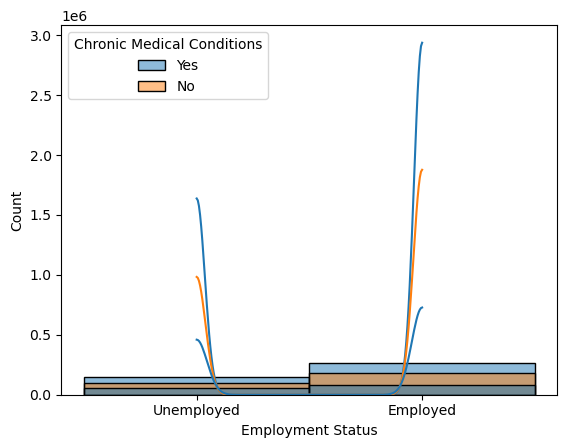

In [43]:
# Histograma
sns.histplot(df['Employment Status'], kde=True)
sns.histplot(data=df, x='Employment Status', kde=True, hue='Chronic Medical Conditions')

# Tablas de estatus de empleo
df[['Age','Employment Status']].groupby('Employment Status').agg('count').sort_values(by='Age',ascending=False)

/home/aipa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/aipa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/aipa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/aipa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, yo

,Age
Alcohol Consumption,
Moderate,173440
Low,139250
High,101078


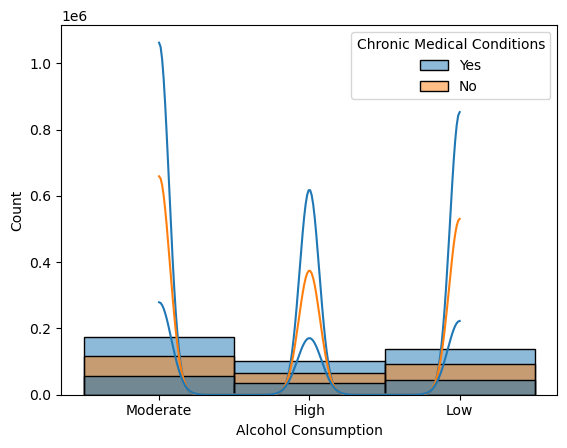

In [44]:
# Histograma
sns.histplot(df['Alcohol Consumption'], kde=True)
sns.histplot(data=df, x='Alcohol Consumption', kde=True, hue='Chronic Medical Conditions')

# Consumo de alcohol 
df[['Age','Alcohol Consumption']].groupby('Alcohol Consumption').agg('count').sort_values(by='Age',ascending=False)

/home/aipa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/aipa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/aipa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/aipa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, yo

,Age
Dietary Habits,
Unhealthy,170817
Moderate,170446
Healthy,72505


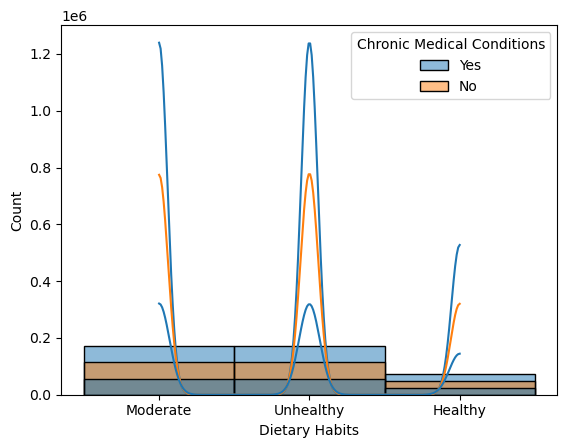

In [45]:
# Histograma
sns.histplot(df['Dietary Habits'], kde=True)
sns.histplot(data=df, x='Dietary Habits', kde=True, hue='Chronic Medical Conditions')
# Hábitos Alimenticios
df[['Age','Dietary Habits']].groupby('Dietary Habits').agg('count').sort_values(by='Age',ascending=False)

/home/aipa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/aipa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/aipa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/aipa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, yo

,Age
Sleep Patterns,
Fair,196789
Poor,129582
Good,87397


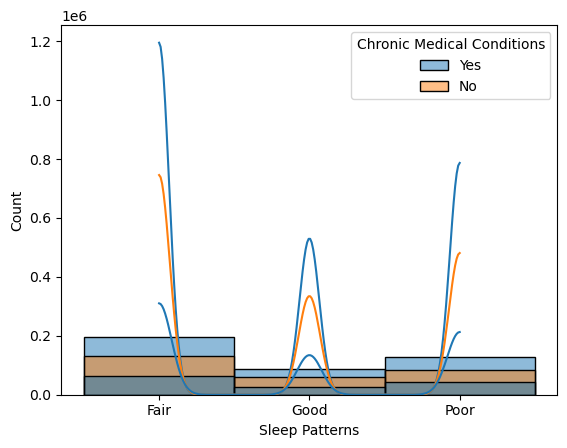

In [46]:
# Histograma
sns.histplot(df['Sleep Patterns'], kde=True)
sns.histplot(data=df, x='Sleep Patterns', kde=True, hue='Chronic Medical Conditions')

# Patrones de Sueño
df[['Age','Sleep Patterns']].groupby('Sleep Patterns').agg('count').sort_values(by='Age',ascending=False)

/home/aipa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/aipa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/aipa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/aipa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, yo

,Age
History of Mental Illness,
No,287943
Yes,125825


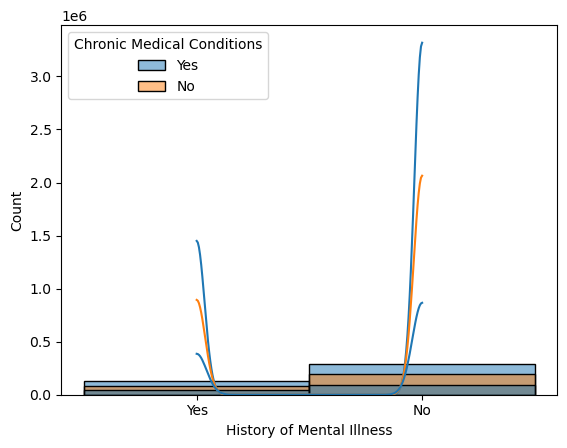

In [47]:
# Histograma
sns.histplot(df['History of Mental Illness'], kde=True)
sns.histplot(data=df, x='History of Mental Illness', kde=True, hue='Chronic Medical Conditions')

# Antecedentes de enfermedades mentales
df[['Age','History of Mental Illness']].groupby('History of Mental Illness').agg('count').sort_values(by='Age',ascending=False)

/home/aipa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/aipa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/aipa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/aipa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, yo

,Age
History of Substance Abuse,
No,284880
Yes,128888


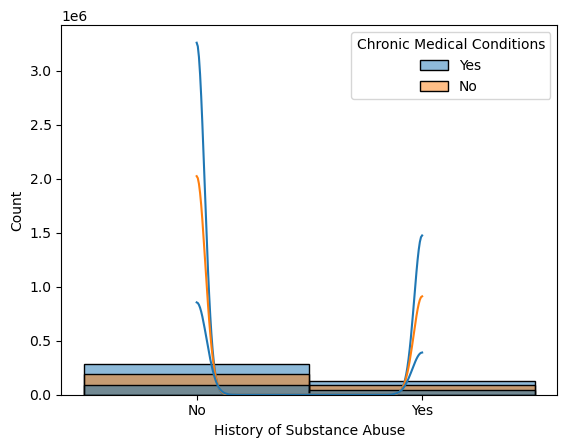

In [48]:
# Histograma
sns.histplot(df['History of Substance Abuse'], kde=True)
sns.histplot(data=df, x='History of Substance Abuse', kde=True, hue='Chronic Medical Conditions')

# Abuso de Sustancias
df[['Age','History of Substance Abuse']].groupby('History of Substance Abuse').agg('count').sort_values(by='Age',ascending=False)

/home/aipa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/aipa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/aipa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/aipa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, yo

,Age
Family History of Depression,
No,302515
Yes,111253


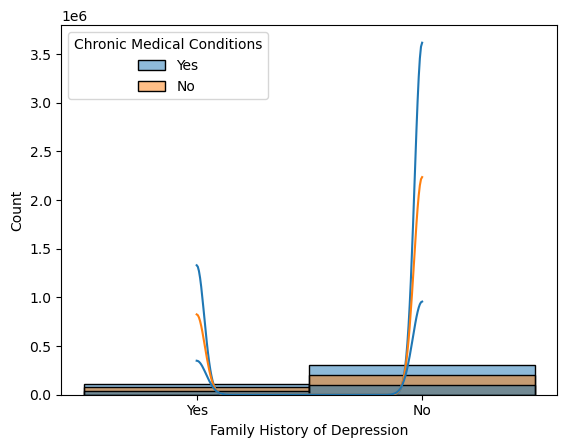

In [49]:
# Histograma
sns.histplot(df['Family History of Depression'], kde=True)
sns.histplot(data=df, x='Family History of Depression', kde=True, hue='Chronic Medical Conditions')

# Historial Familiar de Depression
df[['Age','Family History of Depression']].groupby('Family History of Depression').agg('count').sort_values(by='Age',ascending=False)

/home/aipa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


,Age
Chronic Medical Conditions,
No,277561
Yes,136207


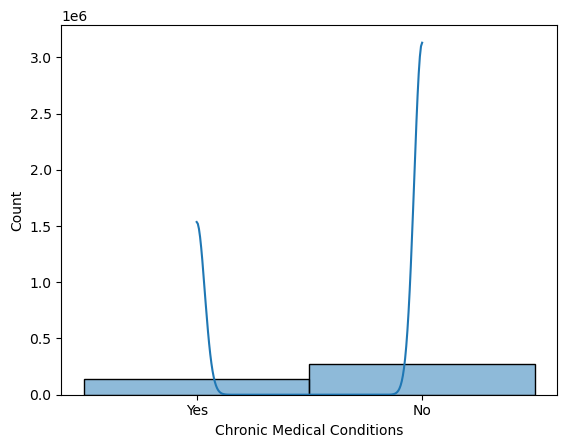

In [50]:
# Histograma
sns.histplot(df['Chronic Medical Conditions'], kde=True)

# Depression Crónica
df[['Age','Chronic Medical Conditions']].groupby('Chronic Medical Conditions').agg('count').sort_values(by='Age',ascending=False,na_position='first')

In [51]:
df.columns

Index(['Name', 'Age', 'Marital Status', 'Education Level',
       'Number of Children', 'Smoking Status', 'Physical Activity Level',
       'Employment Status', 'Income', 'Alcohol Consumption', 'Dietary Habits',
       'Sleep Patterns', 'History of Mental Illness',
       'History of Substance Abuse', 'Family History of Depression',
       'Chronic Medical Conditions'],
      dtype='object')

In [52]:
df_onehot = df.copy()

In [53]:
pd.get_dummies(df_onehot['History of Mental Illness'])

,No,Yes
0,False,True
1,False,True
2,True,False
3,True,False
4,False,True
...,...,...
413763,True,False
413764,False,True
413765,True,False
413766,True,False


In [54]:
df_onehot.drop(['Name','Age','Number of Children', 'Income'],axis=1, inplace=True)

In [55]:
df_onehot

,Marital Status,Education Level,Smoking Status,Physical Activity Level,Employment Status,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Married,Bachelor's Degree,Non-smoker,Active,Unemployed,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Married,High School,Non-smoker,Sedentary,Employed,High,Unhealthy,Fair,Yes,No,No,Yes
2,Widowed,Master's Degree,Non-smoker,Sedentary,Employed,Low,Unhealthy,Good,No,No,Yes,No
3,Divorced,Master's Degree,Non-smoker,Moderate,Unemployed,Moderate,Moderate,Poor,No,No,No,No
4,Single,High School,Non-smoker,Sedentary,Unemployed,Low,Moderate,Fair,Yes,No,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
413763,Married,Master's Degree,Former,Moderate,Employed,Low,Healthy,Good,No,No,No,No
413764,Single,Bachelor's Degree,Current,Active,Employed,Low,Healthy,Poor,Yes,Yes,No,Yes
413765,Married,Bachelor's Degree,Non-smoker,Sedentary,Employed,Moderate,Moderate,Fair,No,No,Yes,Yes
413766,Married,Associate Degree,Non-smoker,Sedentary,Unemployed,Moderate,Moderate,Poor,No,Yes,No,No


In [57]:
def cramers_v(x, y):
    tabla_contingencia = pd.crosstab(x, y)
    chi2, p, dof, ex = chi2_contingency(tabla_contingencia)
    n = np.sum(tabla_contingencia.values)
    return np.sqrt(chi2 / (n * (min(tabla_contingencia.shape) - 1)))

categorical_columns = df_onehot.select_dtypes(include=['object', 'category']).columns
cramers_v_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

for col1 in categorical_columns:
    for col2 in categorical_columns:
        cramers_v_matrix.loc[col1, col2] = cramers_v(df_onehot[col1], df_onehot[col2])

print(cramers_v_matrix)


                             Marital Status Education Level Smoking Status  \
Marital Status                          1.0        0.099987       0.176433   
Education Level                    0.099987             1.0       0.039744   
Smoking Status                     0.176433        0.039744            1.0   
Physical Activity Level            0.232729         0.05788       0.105849   
Employment Status                  0.134409        0.017919       0.083273   
Alcohol Consumption                0.015721        0.051226       0.096837   
Dietary Habits                     0.025928        0.275902       0.061409   
Sleep Patterns                      0.15836         0.01836       0.050033   
History of Mental Illness          0.012519        0.058176       0.005259   
History of Substance Abuse          0.01821        0.005174       0.071499   
Family History of Depression       0.234591        0.017351       0.038081   
Chronic Medical Conditions         0.012724        0.003451     

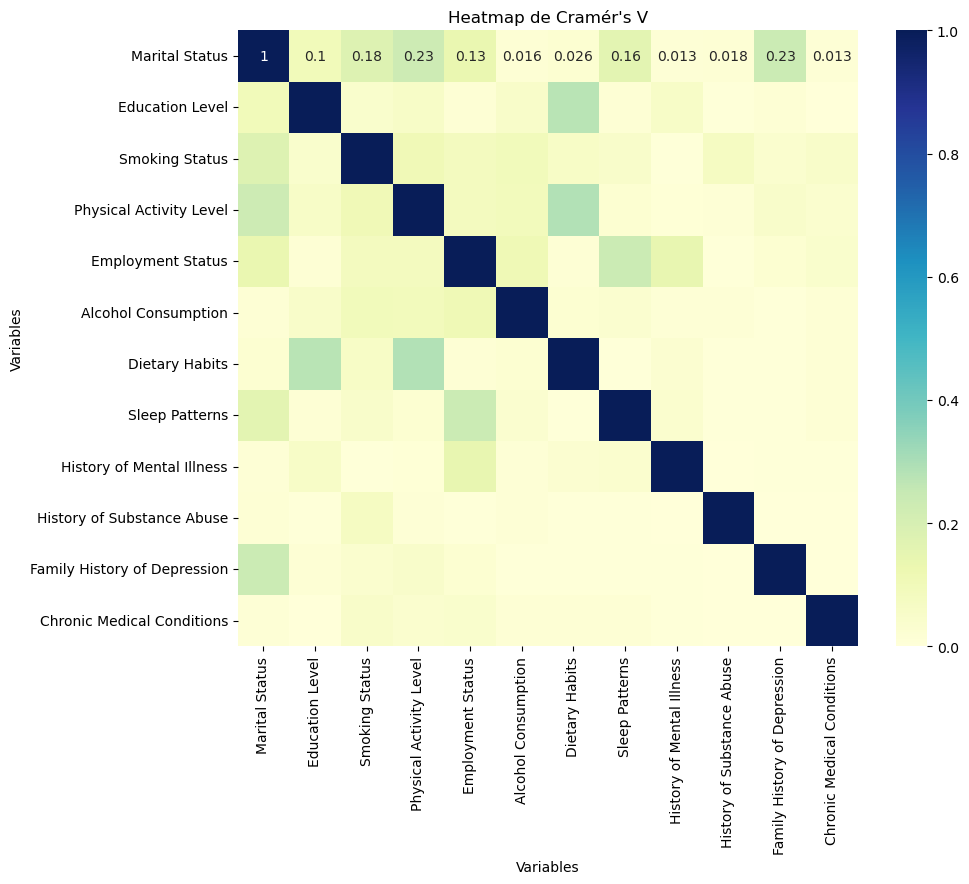

In [62]:
# Configuración del tamaño del gráfico
plt.figure(figsize=(10, 8))

# Generar el heatmap
sns.heatmap(cramers_v_matrix.astype(float), annot=True, cmap="YlGnBu", vmin=0, vmax=1)

# Añadir título y etiquetas a los ejes
plt.title("Heatmap de Cramér's V")
plt.xlabel("Variables")
plt.ylabel("Variables")

# Mostrar el gráfico
plt.show()